<h1> Parte II

<h3> 1. Basándose en la base de datos de competitividad (Indicadores del Pilar de infraestructura del World Economic
Forum) realice las siguientes actividades:

In [1]:
# Importar las librerias requeridas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
# Cargar los datos de los indicadores, transponerlos y ordenarlos

WEF_Ind = pd.read_excel(r'P1-CIndexN.xlsx') 
WEF_Ind.drop('Series units', axis=1, inplace=True)
WEF_Ind.set_index('Series name',inplace=True)
WEF_Ind = WEF_Ind.transpose()
WEF_Ind.index.names = ['Country Name']
WEF_Ind['Railroad density (km/1000 km2)'].fillna(0, inplace=True) #Llena con ceros los valores NA en ferrocarriles, esto es un supuesto

# Cargar los datos del indicador del WEF, transponer y ordenar

WEF_Score = pd.read_excel(r'P1_CIndex_Score.xlsx')
WEF_Score.drop('Series units', axis=1, inplace=True)
WEF_Score.set_index('Series name',inplace=True)
WEF_Score = WEF_Score.transpose()
WEF_Score.index.names = ['Country Name']

# Se unen los datos de los indicadores con los datos del score

WEF = pd.merge(WEF_Ind,WEF_Score, on='Country Name', how='outer')

WEF

Series name,"Quality of land administration index (0-30, best)","Road quality index (0-100, best)",Quality of roads (1-7),Railroad density (km/1000 km2),Efficiency of train services (1-7),"Airport connectivity (0-100, best)",Efficiency of air transport services (1-7),"Liner Shipping Connectivity Index (0-100, best)",Efficiency of seaport services (1-7),Electrification rate (% of population),Electric power losses (% of output),Exposure to unsafe drinking water (% of population),Reliability of water supply (1-7),Mobile-cellular telephone subscriptions (per 100 pop.),Mobile-broadband subscriptions (per 100 pop.),Fixed-broadband internet subscriptions (per 100 pop.),Fibre-to-the-home/building Internet subscriptions (per 100 pop.),Internet users (% of adult population),2nd pillar: Infrastructure
Country Name,,,,,,,,,,,,,,,,,,,
Angola,7.0,56.200755,2.076923,0.000000,2.025210,5973.794633,3.252174,24.58,2.601852,34.7,11.265875,43.508061,1.869565,44.734977,14.618637,0.325404,0.145422,13.000000,40.732624
Albania,15.5,39.358863,4.255176,14.713043,1.304208,8289.055385,3.929053,7.22,4.282265,100.0,17.137373,13.148649,3.728262,119.376340,69.312232,10.020623,1.017582,66.363445,57.319400
United Arab Emirates,21.0,79.522419,5.891117,0.000000,4.559222,425486.614433,5.918826,73.65,5.429650,100.0,7.174589,10.486479,5.915524,210.914023,243.430553,13.998267,13.100451,90.600007,86.217588
Argentina,13.5,92.608664,3.432838,10.260035,2.539824,80596.558765,4.332611,32.89,3.746024,99.6,13.159122,5.096902,4.905469,139.814600,78.050150,17.777359,0.366031,70.968981,67.606453
Armenia,21.5,41.810807,3.622654,22.843309,3.061170,11238.703247,4.397462,NaN,2.623875,100.0,12.398840,6.518472,4.936541,119.043969,66.800184,10.760088,4.699270,64.346030,66.267848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,14.0,44.338130,3.159378,7.091341,3.352830,364184.190009,3.841453,60.47,3.784750,98.3,9.132470,15.028481,4.307014,125.617727,46.948062,11.795941,0.320521,46.500000,65.441470
Yemen,7.0,36.224604,2.217388,0.000000,1.322136,4.154585,2.236999,11.12,2.152599,48.2,25.760421,39.176523,1.534705,59.574130,5.721534,1.560313,0.000000,24.579208,33.528622
South Africa,13.5,94.232110,4.272867,16.815822,3.297999,106077.186097,5.313056,37.35,4.495891,86.3,8.018782,20.132192,4.313192,161.993798,69.968320,2.994438,0.152388,54.000000,68.609193


In [3]:
# Procesamiento inicial

#Eliminar países con información incompleta

WEF.dropna(how='any', inplace=True)

WEF_Ind = WEF.drop('2nd pillar: Infrastructure',axis=1)
WEF_Score = WEF['2nd pillar: Infrastructure']

CountryName=WEF_Ind.index

WEF_Ind

Series name,"Quality of land administration index (0-30, best)","Road quality index (0-100, best)",Quality of roads (1-7),Railroad density (km/1000 km2),Efficiency of train services (1-7),"Airport connectivity (0-100, best)",Efficiency of air transport services (1-7),"Liner Shipping Connectivity Index (0-100, best)",Efficiency of seaport services (1-7),Electrification rate (% of population),Electric power losses (% of output),Exposure to unsafe drinking water (% of population),Reliability of water supply (1-7),Mobile-cellular telephone subscriptions (per 100 pop.),Mobile-broadband subscriptions (per 100 pop.),Fixed-broadband internet subscriptions (per 100 pop.),Fibre-to-the-home/building Internet subscriptions (per 100 pop.),Internet users (% of adult population)
Country Name,,,,,,,,,,,,,,,,,,
Angola,7.0,56.200755,2.076923,0.000000,2.025210,5.973795e+03,3.252174,24.58,2.601852,34.7,11.265875,43.508061,1.869565,44.734977,14.618637,0.325404,0.145422,13.000000
Albania,15.5,39.358863,4.255176,14.713043,1.304208,8.289055e+03,3.929053,7.22,4.282265,100.0,17.137373,13.148649,3.728262,119.376340,69.312232,10.020623,1.017582,66.363445
United Arab Emirates,21.0,79.522419,5.891117,0.000000,4.559222,4.254866e+05,5.918826,73.65,5.429650,100.0,7.174589,10.486479,5.915524,210.914023,243.430553,13.998267,13.100451,90.600007
Argentina,13.5,92.608664,3.432838,10.260035,2.539824,8.059656e+04,4.332611,32.89,3.746024,99.6,13.159122,5.096902,4.905469,139.814600,78.050150,17.777359,0.366031,70.968981
Australia,20.0,90.033294,4.765068,1.249674,4.260202,6.287860e+05,5.378451,28.43,4.716657,100.0,5.661753,2.223595,6.389016,112.688621,134.884431,32.404164,5.931398,88.238658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,17.6,99.959678,5.865725,23.212914,5.711254,7.293522e+06,5.892609,86.28,5.836941,100.0,5.824178,0.498932,6.076547,122.012468,132.910286,33.852611,3.711284,76.176737
Venezuela,5.5,76.937415,2.795166,0.368401,1.462846,7.402416e+03,2.371634,7.94,2.217798,99.5,34.627324,6.453537,2.140419,76.597671,50.144161,8.162469,0.001017,60.000000
Viet Nam,14.0,44.338130,3.159378,7.091341,3.352830,3.641842e+05,3.841453,60.47,3.784750,98.3,9.132470,15.028481,4.307014,125.617727,46.948062,11.795941,0.320521,46.500000


<h3> (a) Realice un análisis de PCA . ¿cuántos componentes se necesitan para explicar al menos el
70 % de la información contenida en la base de datos? Justifique su respuesta.

In [4]:
# PCA

#El análisis requiere de estándarizar los datos de los indicadores

scaler = StandardScaler()
scaled_data = scaler.fit_transform(WEF_Ind)
WEF_Ind_scaled_data = pd.DataFrame(scaled_data,columns= list(WEF_Ind.columns))

WEF_Ind_scaled_data 

,"Quality of land administration index (0-30, best)","Road quality index (0-100, best)",Quality of roads (1-7),Railroad density (km/1000 km2),Efficiency of train services (1-7),"Airport connectivity (0-100, best)",Efficiency of air transport services (1-7),"Liner Shipping Connectivity Index (0-100, best)",Efficiency of seaport services (1-7),Electrification rate (% of population),Electric power losses (% of output),Exposure to unsafe drinking water (% of population),Reliability of water supply (1-7),Mobile-cellular telephone subscriptions (per 100 pop.),Mobile-broadband subscriptions (per 100 pop.),Fixed-broadband internet subscriptions (per 100 pop.),Fibre-to-the-home/building Internet subscriptions (per 100 pop.),Internet users (% of adult population)
0,-1.486887,-0.645405,-2.166531,-0.766341,-1.291471,-0.351587,-1.733243,-0.461341,-2.027143,-3.427862,0.095299,2.458544,-2.629389,-2.589875,-1.560595,-1.287168,-0.688355,-2.068369
1,-0.223776,-1.507864,-0.015777,-0.125881,-1.909331,-0.349180,-0.944786,-1.081031,-0.119235,0.458167,1.048860,0.025572,-1.126085,-0.011004,-0.234946,-0.564660,-0.540955,0.182281
2,0.593531,0.548878,1.599510,-0.766341,0.880043,0.084541,1.372985,1.290284,1.183483,0.458167,-0.569146,-0.187771,0.642961,3.151637,3.985292,-0.268238,1.501113,1.204479
3,-0.520979,1.219014,-0.827733,-0.319721,-0.850474,-0.274009,-0.474705,-0.164703,-0.728072,0.434363,0.402772,-0.619686,-0.173965,0.695141,-0.023158,0.013388,-0.651071,0.376524
4,0.444930,1.087132,0.487677,-0.711942,0.623798,0.295892,0.743534,-0.323910,0.373964,0.458167,-0.814838,-0.849950,1.025920,-0.242066,1.354377,1.103408,0.289506,1.104887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.088287,1.595453,1.574439,0.244119,1.867273,7.224588,1.342446,1.741130,1.645913,0.458167,-0.788460,-0.988163,0.773196,0.080074,1.306529,1.211349,-0.085705,0.596165
81,-1.709789,0.416503,-1.457355,-0.750304,-1.773387,-0.350102,-2.758933,-1.055330,-2.463191,0.428412,3.889316,-0.510967,-2.410323,-1.489014,-0.699537,-0.703134,-0.712760,-0.086103
82,-0.446678,-1.252880,-1.097742,-0.457654,-0.153771,0.020811,-1.046826,0.819805,-0.684104,0.356999,-0.251176,0.176220,-0.657992,0.204637,-0.777003,-0.432360,-0.658762,-0.655477
83,-1.486887,-1.668367,-2.027839,-0.766341,-1.893968,-0.357793,-2.915762,-0.941815,-2.537216,-2.624471,2.449287,2.111419,-2.900222,-2.077180,-1.776241,-1.195140,-0.712932,-1.580005


In [5]:
pca = PCA()
pca.fit(WEF_Ind_scaled_data)
lam_norm = pca.explained_variance_ratio_ # varianza explicada 


acumulada = []
a = 0
for i in lam_norm: 
    a += i
    acumulada.append(a)
    
print(acumulada, '\n')
print(pca.explained_variance_ratio_)

[0.5202452785728571, 0.6210126423883331, 0.6878345875338571, 0.7421142746205082, 0.7901466837848775, 0.8360506082800498, 0.8669943915711217, 0.8927550508774085, 0.9134291945425449, 0.9325338984545801, 0.9479478739950618, 0.9604968983429493, 0.9711100981387082, 0.9804266697738905, 0.9870534270984808, 0.9919100913015262, 0.9966389815441359, 1.0000000000000004] 

[0.52024528 0.10076736 0.06682195 0.05427969 0.04803241 0.04590392
 0.03094378 0.02576066 0.02067414 0.0191047  0.01541398 0.01254902
 0.0106132  0.00931657 0.00662676 0.00485666 0.00472889 0.00336102]


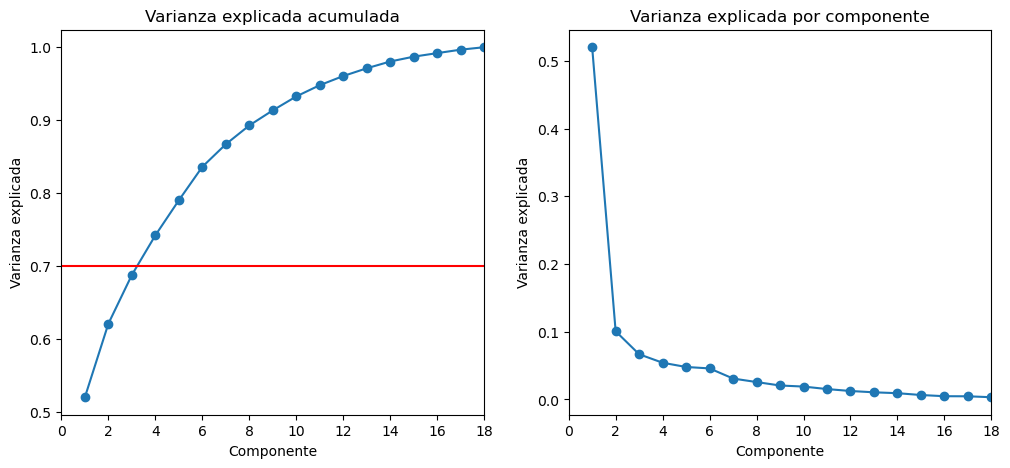

In [6]:
x = np.linspace(1,18,18)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x,acumulada,marker='o')
plt.xlim(0,18)
plt.axhline(0.7,c='r')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada acumulada')

plt.subplot(1,2,2)
plt.plot(x,lam_norm,marker='o')
plt.xlim(0,18)
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por componente')
plt.show()

<h3> (b) Tome los tres primeros componentes y realice un scatter plot en tres dimensiones donde identifique con diferentes colores: 5 países de la OCDE, 5 países de América Latina, 5 países de Africa y 5 países asiáticos. Concluya acerca de la distribución de los datos en esta visualización. ´
Explique que significan los ejes en ese sistema de coordenadas.

In [7]:
# PCA 3 primeros componentes 

pca = PCA(n_components = 3) # Definimos el numero de componentes 
pca.fit(WEF_Ind_scaled_data) # Ajustamos

#Proyectamos al nuevo espacio

scores_pca = pca.transform(WEF_Ind_scaled_data)

#Obtener los valores de cada país en los componentes princiaples

X = []
Y = []
Z = []

for i in range(len(scores_pca)):
    
    X.append(scores_pca[i][0])
    Y.append(scores_pca[i][1])
    Z.append(scores_pca[i][2])

#Otra forma de obtener los valores en cada componente principal

proyecciones = pd.DataFrame(scores_pca,columns = ['PC1', 'PC2', 'PC3'],index= WEF_Ind_scaled_data.index)

In [8]:
#Obtener el índice de los países para generar los arreglos con color diferente de acuerdo con zonas

Lat = ['Colombia','Argentina','Peru','Chile','Ecuador']
Lat_i = []

for i in range(len(CountryName)): 
    for j in range(len(Lat)):
        if CountryName[i]==Lat[j]:
            Lat_i.append(i)
        
OCDE = ['Germany', 'Canada', 'Spain', 'United States', 'France']
OCDE_i = []

for i in range(len(CountryName)): 
    for j in range(len(OCDE)):
        if CountryName[i]==OCDE[j]:
            OCDE_i.append(i)

Afr = ['Nigeria','Tanzania','South Africa','Kenya','Yemen']
Afr_i = []

for i in range(len(CountryName)): 
    for j in range(len(Afr)):
        if CountryName[i]==Afr[j]:
            Afr_i.append(i)

Asia = ['India','China','Indonesia','Japan','Thailand']
Asia_i = []

for i in range(len(CountryName)): 
    for j in range(len(Asia)):
        if CountryName[i]==Asia[j]:
            Asia_i.append(i)

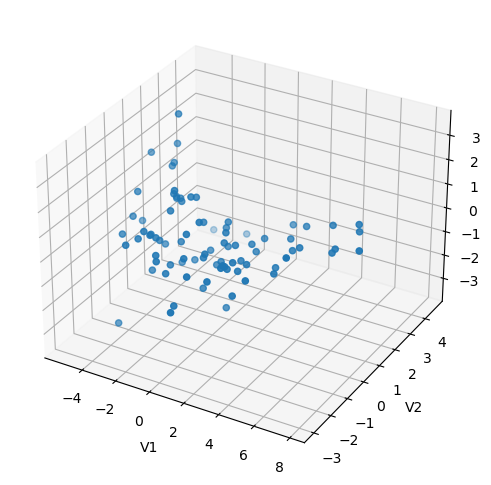

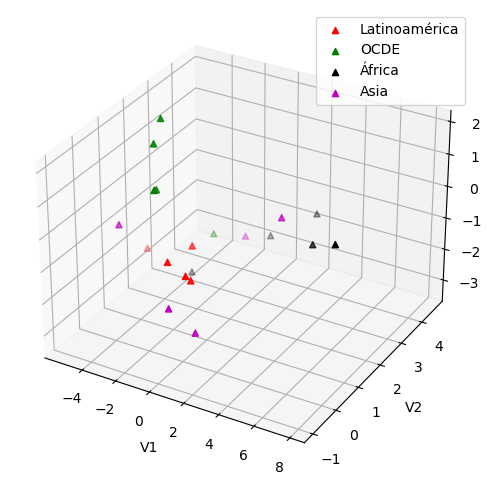

In [9]:
#Algoritmo base para graficar 

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

#Datos componente principal 1
x=np.array(X)

#Datos componente principal 2
y=np.array(Y)

#Datos componente principal 3
z=np.array(Z)

# Graficar con colores diferentes
# Para graficar se ingresan los datos en arrays.

ax.scatter(x, y, z) # Graficamos todos los paises a excepcion de los que identificaremos de diferente color

#Etiquetas de los ejes
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[Lat_i], y[Lat_i], z[Lat_i], c='r', marker='^',label='Latinoamérica') # Graficamos 5 paises de America latina
ax.scatter(x[OCDE_i], y[OCDE_i], z[OCDE_i], c='g', marker='^',label='OCDE') # Graficamos 5 paises de la OCDE
ax.scatter(x[Afr_i], y[Afr_i], z[Afr_i], c='k', marker='^',label='África') # Graficamos 5 paises de Africa
ax.scatter(x[Asia_i], y[Asia_i], z[Asia_i], c='m', marker='^',label='Asia') # Graficamos 5 paises asiaticos
ax.legend()

#Etiquetas de los ejes
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')

plt.show()

<h3> (c) Una forma de construir un indicador de competitividad único (para cada punto - país, p) es la siguiente:

<h3> $ I_{p}=\sum_{j=1}^{m} w_j \, c_{pj} $

<h3> donde m es el número de componentes principales incluidos en el análisis y $c_{pj}$ es el valor del
país p con respecto al componente principal j; y $ \sum_{j=1} w_j=1$

<h4> $\bullet$  Calcule este indicador, para cada país, utilizando todos los componentes principales.

In [10]:
def pca_n_comp(N_componentes): #Recibe un número que indica la cantidad de componentes princpales
    
    pca = PCA(n_components = N_componentes) # Definimos el numero de componentes 
    pca.fit(WEF_Ind_scaled_data) # Ajustamos

    #Proyectamos al nuevo espacio

    scores_pca = pca.transform(WEF_Ind_scaled_data)

    #Cálculamos el indicador

    indicador = []

    for i in range(len(scores_pca)):
        indicador.append(np.sum(scores_pca[i]*pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_))

    #Devolvemos el indicador a dataframe y le asiganmos como index el nombre del país
    
    a = 'Ind_{}'.format(N_componentes)
    
    Indicador = pd.DataFrame(indicador,index=CountryName, columns = [a])
    Indicador.reset_index(inplace=True)
    
    def minmax_norm(df_input):
        return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

    Indicador_norm = minmax_norm(Indicador[a])
    Indicador_norm = pd.DataFrame(np.array(Indicador_norm),index=CountryName, columns = [a])
    Indicador_norm.reset_index(inplace=True)
    Indicador_norm

    return Indicador, Indicador_norm

In [11]:
# Indicador utilizando todos los componentes principales

pca = PCA() # Definimos el numero de componentes 
pca.fit(WEF_Ind_scaled_data) # Ajustamos

#Proyectamos al nuevo espacio

scores_pca = pca.transform(WEF_Ind_scaled_data)

#Cálculamos el indicador

indicador = []

for i in range(len(scores_pca)):
    indicador.append(np.sum(scores_pca[i]*pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_))

#Devolvemos el indicador a dataframe y le asiganmos como index el nombre del país
    
Indicador = pd.DataFrame(indicador,index=CountryName, columns = ['Ind_todos'])
Indicador.reset_index(inplace=True)

def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

Indicador_norm = minmax_norm(Indicador['Ind_todos'])
Indicador_norm = pd.DataFrame(np.array(Indicador_norm),index=CountryName, columns = ['Ind_todos'])
Indicador_norm.reset_index(inplace=True)

<h4> $\bullet$ Calcule este indicador utilizando los primeros 2, 4, 6, 8 y 10 componentes. Nota: en este
caso es necesario recalcular los pesos (i.e., normalizarlos para que sumen 1). ¿Cómo cambia
el indicador a medida que se incluyen un mayor número de componentes en el análisis?

In [12]:
# Indicador utilizando los dos primeros componentes principales

Ind_2,Ind_2_norm = pca_n_comp(2)

# Indicador utilizando los cuatro primeros componentes principales

Ind_4,Ind_4_norm = pca_n_comp(4)

# Indicador utilizando los seis primeros componentes principales

Ind_6,Ind_6_norm = pca_n_comp(6)

# Indicador utilizando los ocho primeros componentes principales

Ind_8,Ind_8_norm = pca_n_comp(8)

# Indicador utilizando los diez primeros componentes principales

Ind_10,Ind_10_norm = pca_n_comp(10)

In [13]:
# Una forma de comparar podría ser unir todos los indicadores en un solo DataFrame
# Si lo desea una los Dataframe creados en las ultimas celdas con --> pd.concat

A = pd.merge(Ind_2, Ind_4, how='outer')
B = pd.merge(A,Ind_6, how='outer')
C = pd.merge(B,Ind_8, how='outer')
D = pd.merge(C,Ind_10, how='outer')
Indicadores = pd.merge(D,Indicador, how='outer')

columnas = Indicadores.columns

Text(0.5, 1.0, 'Variación del rango del indicador con respecto a la cantidad de componentes')

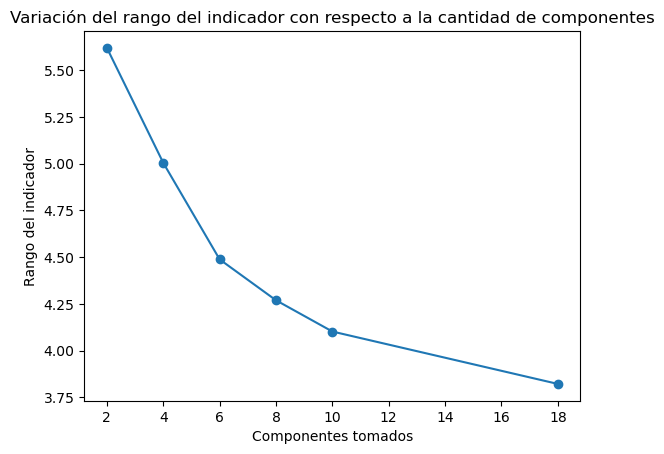

In [14]:
rango = []
x = [2,4,6,8,10,18]
for i in range(len(columnas)):
    
    if i > 0: 
        
        Indicadores.sort_values(columnas[i])
        a = Indicadores[columnas[i]][0] - Indicadores[columnas[i]][84]
        
        rango.append(a)
        
plt.figure()
plt.plot(x,rango,marker='o')
plt.xlabel('Componentes tomados')
plt.ylabel('Rango del indicador')
plt.title('Variación del rango del indicador con respecto a la cantidad de componentes')

In [15]:
#Uniendo indicadores normalizados

A = pd.merge(Ind_2_norm, Ind_4_norm, how = 'outer')
B = pd.merge(A,Ind_6_norm, how='outer')
C = pd.merge(B,Ind_8_norm, how='outer')
D = pd.merge(C,Ind_10_norm, how='outer')
Indicadores_norm = pd.merge(D,Indicador_norm, how='outer')

Indicadores_norm

,Country Name,Ind_2,Ind_4,Ind_6,Ind_8,Ind_10,Ind_todos
0,Angola,0.937996,0.942842,0.935458,0.934142,0.931964,0.934450
1,Albania,0.527442,0.513065,0.511725,0.516984,0.518663,0.520671
2,United Arab Emirates,0.049204,0.011466,0.012912,0.004861,0.010574,0.011207
3,Argentina,0.419940,0.400978,0.412002,0.408017,0.405098,0.406325
4,Australia,0.187065,0.179987,0.192439,0.197167,0.195909,0.196985
...,...,...,...,...,...,...,...
80,United States,0.103510,0.053167,0.077964,0.086975,0.091744,0.093028
81,Venezuela,0.773092,0.759061,0.789238,0.787611,0.784359,0.784763
82,Viet Nam,0.525412,0.501712,0.492484,0.493196,0.490375,0.490522
83,Yemen,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
Indicadores_norm.sort_values('Ind_todos')
#Indicadores_norm.sort_values('Ind_todos')

,Country Name,Ind_2,Ind_4,Ind_6,Ind_8,Ind_10,Ind_todos
41,Japan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,United Arab Emirates,0.049204,0.011466,0.012912,0.004861,0.010574,0.011207
55,Netherlands,0.009410,0.018217,0.009517,0.010660,0.012973,0.012653
25,Finland,0.038047,0.041579,0.042996,0.045466,0.046207,0.047895
71,Sweden,0.040732,0.049927,0.059067,0.058333,0.056091,0.057765
...,...,...,...,...,...,...,...
14,Cameroon,0.870744,0.865119,0.859551,0.857994,0.857366,0.858292
54,Nigeria,0.882323,0.876711,0.876348,0.871338,0.868688,0.871083
0,Angola,0.937996,0.942842,0.935458,0.934142,0.931964,0.934450
51,Mozambique,0.937924,0.949887,0.946866,0.945593,0.946470,0.946972


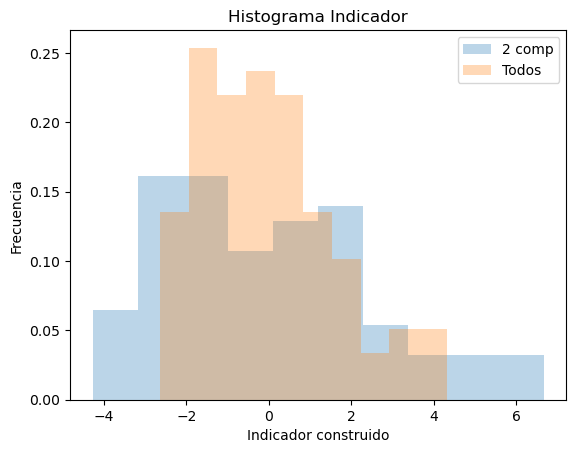

In [17]:
plt.hist(Indicadores['Ind_2'],density=1,alpha=0.3,label='2 comp')
#plt.hist(Indicadores['Ind_4'],density=1,alpha=0.3,label='4 comp')
#plt.hist(Indicadores['Ind_6'],density=1,alpha=0.3,label='6 comp')
#plt.hist(Indicadores['Ind_8'],density=1,alpha=0.3,label='8 comp')
#plt.hist(Indicadores['Ind_10'],density=1,alpha=0.3,label='10 comp')
plt.hist(Indicadores['Ind_todos'],density=1,alpha=0.3,label='Todos')
plt.xlabel('Indicador construido')
plt.ylabel('Frecuencia')
plt.title('Histograma Indicador')
plt.legend()

<h4> $\bullet$ ¿Cómo se comparan los indicadores derivados de PCA, con los indicadores globales propuestos por el World Economic Forum? Analice y concluya.

In [18]:
# Filtrar DataFrame con el Indice de competitividad en Infraestructura (Pilar de Infraestructura)

WEF_Score_Array = np.array(WEF_Score)
WEF_Score_Norm_Array = (WEF_Score_Array - WEF_Score_Array.min())/(WEF_Score_Array.max()-WEF_Score_Array.min())
WEF_Score_Norm = pd.DataFrame(WEF_Score_Norm_Array,index=CountryName, columns = ['Indicador WBF norm'])
WEF_Score_Norm.reset_index(inplace=True)

#Ordenar para comparar ambos indicadores

print(WEF_Score_Norm.sort_values(ascending=False,by='Indicador WBF norm'))
print(Indicador_norm.sort_values(ascending=False,by='Ind_todos'))

     Country Name  Indicador WBF norm
55    Netherlands            1.000000
41          Japan            0.984203
18        Germany            0.962919
26         France            0.961665
80  United States            0.950418
..            ...                 ...
54        Nigeria            0.149108
14       Cameroon            0.144860
0          Angola            0.122400
51     Mozambique            0.064177
83          Yemen            0.000000

[85 rows x 2 columns]
            Country Name  Ind_todos
83                 Yemen   1.000000
51            Mozambique   0.946972
0                 Angola   0.934450
54               Nigeria   0.871083
14              Cameroon   0.858292
..                   ...        ...
71                Sweden   0.057765
25               Finland   0.047895
55           Netherlands   0.012653
2   United Arab Emirates   0.011207
41                 Japan   0.000000

[85 rows x 2 columns]


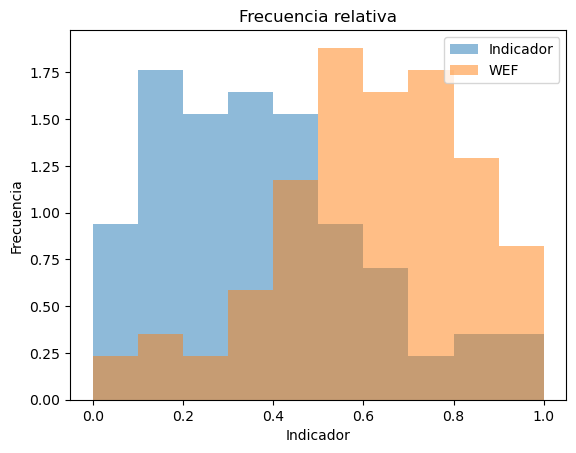

In [19]:
#Histogramas para comparar

plt.hist(Indicador_norm['Ind_todos'],density=1,alpha=0.5,label='Indicador');
plt.hist(WEF_Score_Norm['Indicador WBF norm'],density=1,alpha=0.5,label='WEF');
plt.title('Frecuencia relativa')
plt.xlabel('Indicador')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Considerando solo 2 componentes principales')

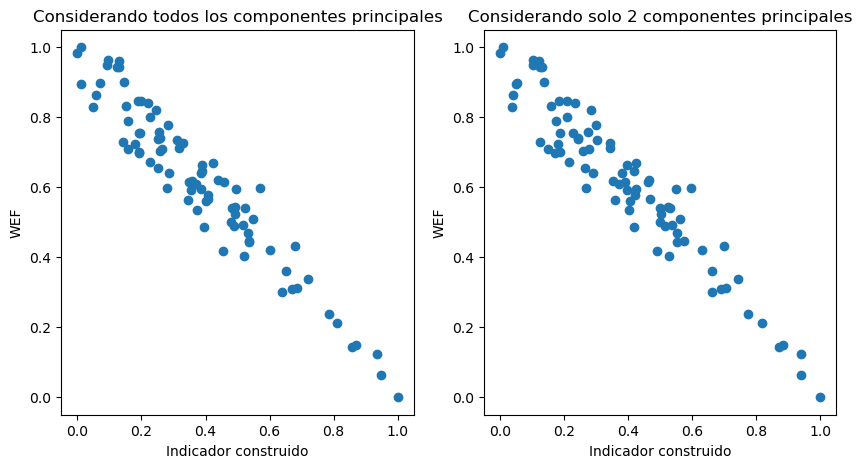

In [20]:
Indicadores_comp = pd.merge(Indicadores_norm,WEF_Score_Norm,how='outer') 

#Gráfica para evaluar relación lineal

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(Indicadores_comp['Ind_todos'],Indicadores_comp['Indicador WBF norm'])
plt.xlabel("Indicador construido") # Establecer el título del eje x
plt.ylabel("WEF") # Establecer el título del eje y
plt.title('Considerando todos los componentes principales')

plt.subplot(1,2,2)
plt.scatter(Indicadores_comp['Ind_2'],Indicadores_comp['Indicador WBF norm'])
plt.xlabel("Indicador construido") # Establecer el título del eje x
plt.ylabel("WEF") # Establecer el título del eje y
plt.title('Considerando solo 2 componentes principales')

In [21]:
#Cálculo de covarianza y matriz de correlación

#Indicadores_comp.set_index('Country Name',inplace=True)

cov = np.cov(Indicadores_comp['Ind_todos'],Indicadores_comp['Indicador WBF norm'])

corr = np.corrcoef(Indicadores_comp['Ind_todos'],Indicadores_comp['Indicador WBF norm'])

print('El coeficiente de correlación obtenido para el indicador del banco mundial y el indicador construido con el análisis de componentes principales es ', corr[1][0], ' lo que indica una correlación negativa fuerte.')

Indicadores_comp.corr()

El coeficiente de correlación obtenido para el indicador del banco mundial y el indicador construido con el análisis de componentes principales es  -0.9603806042668274  lo que indica una correlación negativa fuerte.


C:\Users\Admin\AppData\Local\Temp\ipykernel_20452\1928925772.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Indicadores_comp.corr()


,Ind_2,Ind_4,Ind_6,Ind_8,Ind_10,Ind_todos,Indicador WBF norm
Ind_2,1.000000,0.998388,0.997661,0.997497,0.997442,0.997413,-0.956493
Ind_4,0.998388,1.000000,0.999271,0.999108,0.999052,0.999024,-0.959280
Ind_6,0.997661,0.999271,1.000000,0.999836,0.999781,0.999752,-0.960019
Ind_8,0.997497,0.999108,0.999836,1.000000,0.999945,0.999916,-0.960100
Ind_10,0.997442,0.999052,0.999781,0.999945,1.000000,0.999971,-0.960552
Ind_todos,0.997413,0.999024,0.999752,0.999916,0.999971,1.000000,-0.960381
Indicador WBF norm,-0.956493,-0.959280,-0.960019,-0.960100,-0.960552,-0.960381,1.000000


<h3> 2. Le proporcionamos una base de datos de emisiones de CO2 y NOx recolectados de tres fuentes distintas (archivo: datos_emisiones.xlsx), desarrolle las siguientes actividades:

<h4> (a) Identifique las tres fuentes de emisiones. Para esto realice K-means con 3 clusters y grafique sus resultados de forma que se evidencie la clasificación dada a cada instancia. Explique el procedimiento y analice sus resultados.

In [22]:
# Carga los datos desde el archivo Excel
data = pd.read_excel('datos_emisiones.xlsx')
data

,Emission_CO2 (Tm/a),Emission_NOx (Tm/a)
0,2.950088,1.848643
1,9.955912,2.390093
2,7.646568,0.383526
3,1.544467,2.017479
4,2.465662,0.463756
...,...,...
295,5.680673,5.255389
296,1.260437,3.543015
297,9.099660,2.655264
298,5.426420,10.614003


In [23]:
# Realiza K-Means para clasificar los datos en 3 grupos

#Normalización 

data_array = data.to_numpy()
data_norm_array = (data_array-np.min(data_array))/(np.max(data_array,axis=0)-np.min(data_array))
data_norm = pd.DataFrame(data_norm_array,columns=['Emission_CO2 (Tm/a)','Emission_NOx (Tm/a)'])

#k-means

kmeans = KMeans(n_clusters=3).fit(data_norm_array)

centroids = kmeans.cluster_centers_

df_cluster=pd.DataFrame(kmeans.predict(data_norm_array),index=data.index, columns=['cluster'])

#Almaceno los index de cada categoría 

cero = []
uno = []
dos = []

for i in range(len(df_cluster)): 
    
    if df_cluster['cluster'][i]==0: 
        cero.append(i)
        
    elif df_cluster['cluster'][i]==1:
        uno.append(i)
        
    else: 
        dos.append(i)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


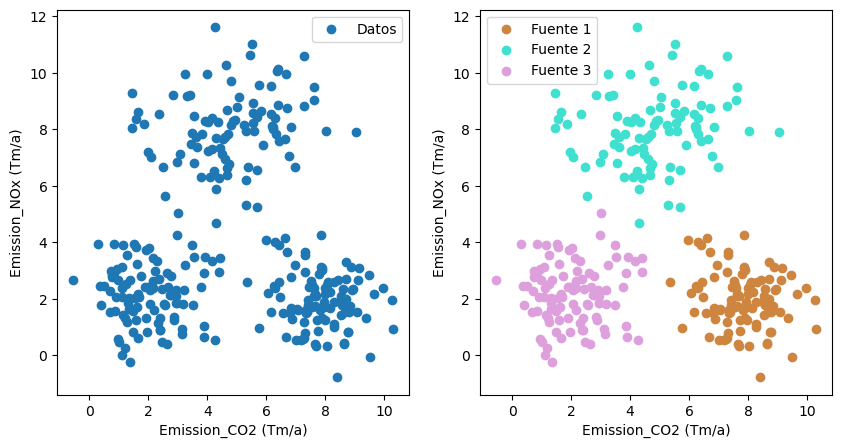

In [24]:
# Grafica los datos originales con colores correspondientes a los clusters de K-Means

X = data['Emission_CO2 (Tm/a)']
Y = data['Emission_NOx (Tm/a)']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X,Y,label='Datos')
plt.xlabel('Emission_CO2 (Tm/a)')
plt.ylabel('Emission_NOx (Tm/a)')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X[cero],Y[cero],label='Fuente 1',c='peru')
plt.scatter(X[uno],Y[uno],label='Fuente 2',c='turquoise')
plt.scatter(X[dos],Y[dos],label='Fuente 3',c='plum')
plt.xlabel('Emission_CO2 (Tm/a)')
plt.ylabel('Emission_NOx (Tm/a)')
plt.legend()

In [25]:
print('La cantidad de registros de la fuente uno es ', len(cero), '\n Los registros de la fuente dos son ', len(uno), '\n Los registros de la fuente tres son ', len(dos))

La cantidad de registros de la fuente uno es  103 
 Los registros de la fuente dos son  95 
 Los registros de la fuente tres son  102


<h4> (b) Convierta todas las emisiones a $CO2_{eq}$, encuentre el máximo, el mínimo y el promedio de $CO2_{eq}$ de cada fuente. En promedio ¿cuál fuente genera mayor contaminación? Analice y concluya. 
    
Considere para sus cálculos la siguiente expresión:

<h3> $ CO2_{eq} = \text{Emisiones (Tm/a) x} \text{ Factor de Equivalencia (GWP)} $

Los factores de equivalencia son proporcionados por organismos de regulación ambiental y pueden variar según las normativas y las metodologías utilizadas en cada región. Para efectos prácticos utilice un factor de equivalencia para el óxido de nitrogeno de 298 $CO2_{eq} \text{ / Tm de NOx/a}$ (IPCC, 2005)

In [26]:
#Convertir NOx a CO2eq

NOx_eq = data['Emission_NOx (Tm/a)']*298
CO2 = data['Emission_CO2 (Tm/a)']

CO2_tot = NOx_eq + CO2

#Agrupar de acuerdo con el cluster

CO2_tot_0 = CO2_tot[cero]
CO2_tot_1 = CO2_tot[uno]
CO2_tot_2 = CO2_tot[dos]

#Convertir a dataframe para operar más fácilmente

CO2_0 = pd.DataFrame(CO2_tot_0,columns=['CO2 eq'])
CO2_1 = pd.DataFrame(CO2_tot_1,columns=['CO2 eq'])
CO2_2 = pd.DataFrame(CO2_tot_2,columns=['CO2 eq'])


In [27]:
#Máximo, mínimo y promedio de cada fuente

#Fuente 1

max0 = float(CO2_0.max(axis=0))
min0 = float(CO2_0.min(axis=0))
prom0 = float(CO2_0.mean(axis=0))

#Fuente 2

max1 = float(CO2_1.max(axis=0))
min1 = float(CO2_1.min(axis=0))
prom1 = float(CO2_1.mean(axis=0))

#Fuente 3

max2 = float(CO2_2.max(axis=0))
min2 = float(CO2_2.min(axis=0))
prom2 = float(CO2_2.mean(axis=0))

print('Para la fuente 1 el máximo de emisiones es ',max0, ', el mínimo es ', min0, ' y el promedio es ', prom0, '\n'
      'Para la fuente 2 el máximo de emisiones es ',max1, ', el mínimo es ', min1, ' y el promedio es ', prom1, '\n'
      'Para la fuente 3 el máximo de emisiones es ',max2, ', el mínimo es ', min2, ' y el promedio es ', prom2, '\n')

Para la fuente 1 el máximo de emisiones es  1276.3459351787026 , el mínimo es  -221.83359506950163  y el promedio es  588.6935541500783 
Para la fuente 2 el máximo de emisiones es  3466.6125697050907 , el mínimo es  1404.2524490993005  y el promedio es  2401.299028293938 
Para la fuente 3 el máximo de emisiones es  1507.0264461837573 , el mínimo es  -65.21775776571201  y el promedio es  652.8286319411752 



In [28]:
#eliminando los negativos

neg_0 = CO2_0[CO2_0['CO2 eq']<0].index
neg_1 = CO2_1[CO2_1['CO2 eq']<0].index
neg_2 = CO2_2[CO2_2['CO2 eq']<0].index

CO2_00 = CO2_0.drop(neg_0,axis=0)
CO2_10 = CO2_1.drop(neg_1,axis=0)
CO2_20 = CO2_2.drop(neg_2,axis=0)

In [29]:
#Máximo, mínimo y promedio de cada fuente

#Fuente 1

max0 = float(CO2_00.max(axis=0))
min0 = float(CO2_00.min(axis=0))
prom0 = float(CO2_00.mean(axis=0))

#Fuente 2

max1 = float(CO2_10.max(axis=0))
min1 = float(CO2_10.min(axis=0))
prom1 = float(CO2_10.mean(axis=0))

#Fuente 3

max2 = float(CO2_20.max(axis=0))
min2 = float(CO2_20.min(axis=0))
prom2 = float(CO2_20.mean(axis=0))

print('Para la fuente 1 el máximo de emisiones es ',max0, ', el mínimo es ', min0, ' y el promedio es ', prom0, '\n'
      'Para la fuente 2 el máximo de emisiones es ',max1, ', el mínimo es ', min1, ' y el promedio es ', prom1, '\n'
      'Para la fuente 3 el máximo de emisiones es ',max2, ', el mínimo es ', min2, ' y el promedio es ', prom2, '\n')

Para la fuente 1 el máximo de emisiones es  1276.3459351787026 , el mínimo es  104.24185274461983  y el promedio es  602.6597101528426 
Para la fuente 2 el máximo de emisiones es  3466.6125697050907 , el mínimo es  1404.2524490993005  y el promedio es  2401.299028293938 
Para la fuente 3 el máximo de emisiones es  1507.0264461837573 , el mínimo es  6.834866721639653  y el promedio es  659.9380021362929 



<h4> (c) Grafique el histograma de frecuencia relativa de cada fuente y ajuste cada histograma a una pdf normal. Analice sus resultados y concluya.

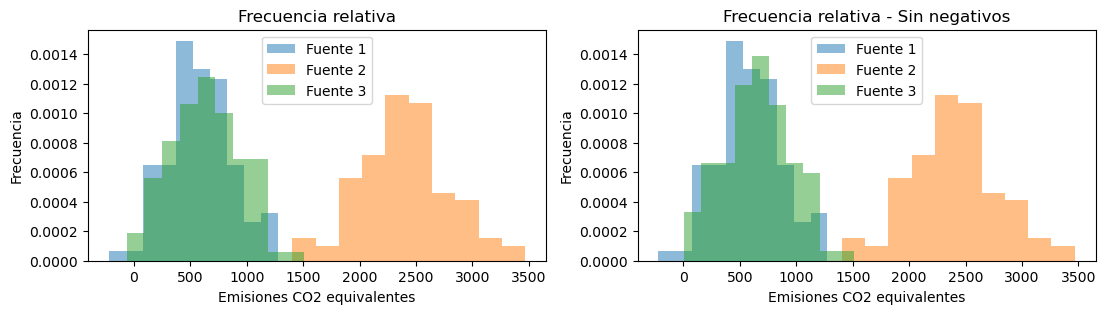

In [30]:
#Histogramas de frecuencia relativa

plt.figure(figsize=(13,3))

plt.subplot(1,2,1)
plt.hist(CO2_0['CO2 eq'],density=1,alpha=0.5,label='Fuente 1');
plt.hist(CO2_1['CO2 eq'],density=1,alpha=0.5,label='Fuente 2');
plt.hist(CO2_2['CO2 eq'],density=1,alpha=0.5,label='Fuente 3');
plt.title('Frecuencia relativa')
plt.xlabel('Emisiones CO2 equivalentes')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(CO2_0['CO2 eq'],density=1,alpha=0.5,label='Fuente 1');
plt.hist(CO2_10['CO2 eq'],density=1,alpha=0.5,label='Fuente 2');
plt.hist(CO2_20['CO2 eq'],density=1,alpha=0.5,label='Fuente 3');
plt.title('Frecuencia relativa - Sin negativos')
plt.xlabel('Emisiones CO2 equivalentes')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

In [31]:
#Ajustar pdf normal al histograma

def ajuste_pdf_normal(a): #Recibe el conjunto de datos

    datos = np.array(a) #Datos 

    mu, std = stats.norm.fit(datos) #Parámetros estimados

    #Pdf con los parámetros ajustados a los datos
    data1 = np.linspace(min(datos),max(datos),100)
    pdf = stats.norm.pdf(data1, mu, std)
    
    return mu, std, [data1,pdf]

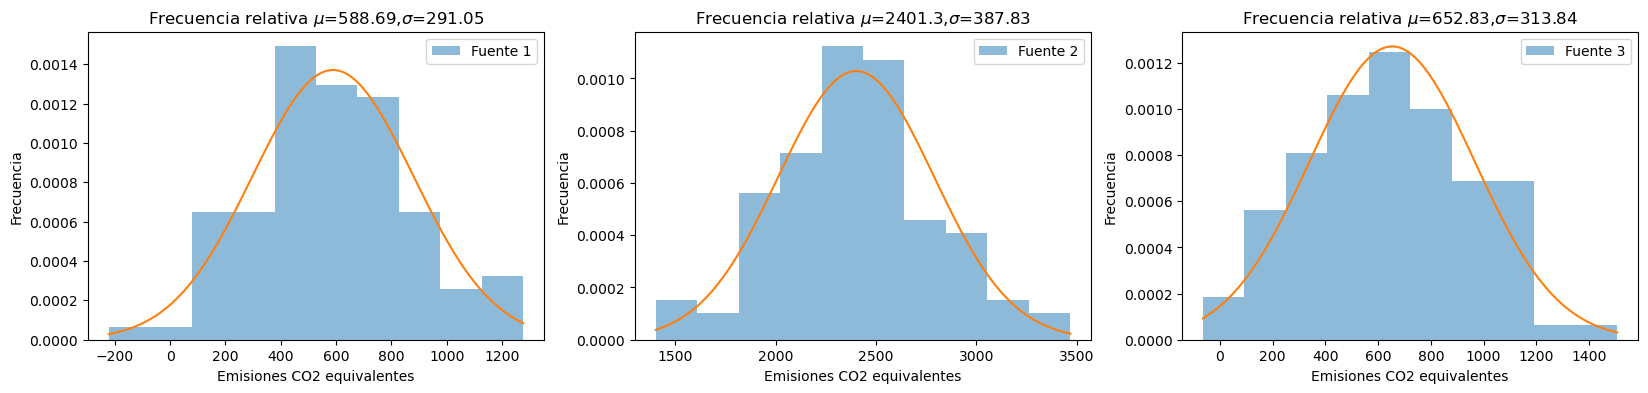

In [32]:
mu_0,std_0,fit_0 = ajuste_pdf_normal(CO2_0['CO2 eq'])
mu_1,std_1,fit_1 = ajuste_pdf_normal(CO2_1['CO2 eq'])
mu_2,std_2,fit_2 = ajuste_pdf_normal(CO2_2['CO2 eq'])

plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
plt.hist(CO2_0['CO2 eq'],density=1,alpha=0.5,label='Fuente 1');
plt.plot(fit_0[0],fit_0[1])
plt.title(r'Frecuencia relativa $\mu$={},$\sigma$={}'.format(round(mu_0,2),round(std_0,2)))
plt.xlabel('Emisiones CO2 equivalentes')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.hist(CO2_1['CO2 eq'],density=1,alpha=0.5,label='Fuente 2');
plt.plot(fit_1[0],fit_1[1])
plt.title(r'Frecuencia relativa $\mu$={},$\sigma$={}'.format(round(mu_1,2),round(std_1,2)))
plt.xlabel('Emisiones CO2 equivalentes')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.hist(CO2_2['CO2 eq'],density=1,alpha=0.5,label='Fuente 3');
plt.plot(fit_2[0],fit_2[1])
plt.title(r'Frecuencia relativa $\mu$={},$\sigma$={}'.format(round(mu_2,2),round(std_2,2)))
plt.xlabel('Emisiones CO2 equivalentes')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

<h3> 3. Le proporcionamos una base de 300 datos de emisiones de CO2 y NOx recolectados de 2 fuentes distintas (archivo: datos_emisiones_rl_ent.xlsx). Realice las siguientes actividades:

<h4> (a) Entrene una regresión logística para clasificar las dos fuentes. Utilice el 20/% de sus datos para la validación del modelo. Indique y analice el rendimiento de su modelo para clasificar cada fuente.

In [33]:
# Cargar los datos
data_class = pd.read_excel('datos_emisiones_rl_ent.xlsx')
data_class

,Emission_CO2 (Tm/a),Emission_NOx (Tm/a),Fuente
0,3.376569,3.673117,0
1,4.242110,3.381903,0
2,4.191478,4.570529,0
3,5.982891,3.562625,0
4,7.628365,6.252470,1
...,...,...,...
295,3.617607,4.131423,0
296,4.146300,3.391403,0
297,8.729124,4.502257,1
298,9.921357,5.019463,1


In [34]:
# Entrena un modelo de regresión logística

X_log= data_class.iloc[:,0:2].values
Y_log = data_class['Fuente'].values

X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size = 0.2, random_state=1)

lr = LogisticRegression() #Se genera el modelo logistico
lr.fit(X_log_train, Y_log_train) #Se entrena el modelo

y_pred = lr.predict(X_log_train) #Se realiza la prediccion del train set

confusion=confusion_matrix(Y_log_train, y_pred)/np.sum(confusion_matrix(Y_log_train, y_pred)) #generacion de la matriz de errores

accuracy=np.trace(confusion) #calculo de la exactitud

print("The model performance for training set")
print('Accuracy of {}'.format(accuracy))

y_pred = lr.predict(X_log_test)

confusion = confusion_matrix(Y_log_test, y_pred)/np.sum(confusion_matrix(Y_log_test, y_pred))

accuracy = np.trace(confusion)

print("--------------------------------------")
print("The model performance for testing set")
print('Accuracy of {}'.format(accuracy))

# Evalúa el rendimiento del modelo

print("--------------------------------------")
print('Rendimiento del modelo')
print(classification_report(Y_log_test, y_pred))

The model performance for training set
Accuracy of 0.95
--------------------------------------
The model performance for testing set
Accuracy of 0.9
--------------------------------------
Rendimiento del modelo
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



<h4> (b) Grafique emisiones de NOx vs emisiones de CO2, asigne un color a cada fuente indicada en el Excel y dibuje la línea de decisión de la regresión logística entrenada en (a). Compare sus resultados visuales con el rendimiento del modelo encontrado en (a). 

In [35]:
# Encontrar los coeficientes de la línea de decisión (pendiente e intercepto) - 

coef = lr.coef_[0]
intercept = lr.intercept_

m = -coef[0]/coef[1]
b = -intercept/coef[1]

x = np.linspace(3.5,8.5,100)
y = m*x + b

print(coef)

[1.38406454 0.67255777]


Text(0.5, 1.0, 'Regresión logística')

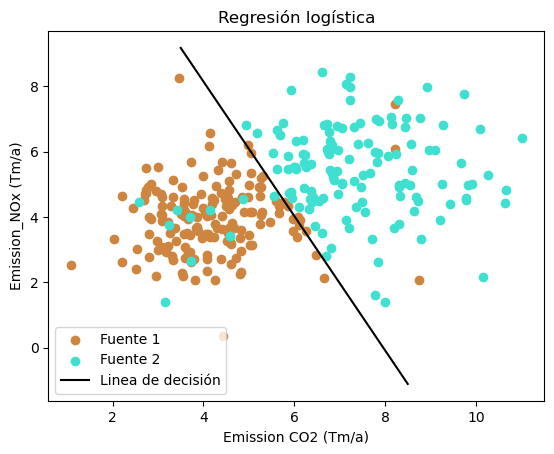

In [36]:
#identificar los índices de una fuente u otra

i_0 = []
i_1 = []

for i in range(len(data_class['Fuente'])):
    
    if data_class['Fuente'][i] == 0: 
        i_0.append(i)
    
    else: 
        i_1.append(i)

#graficar
        
plt.scatter(data_class['Emission_CO2 (Tm/a)'][i_0],data_class['Emission_NOx (Tm/a)'][i_0],label='Fuente 1',c='peru')
plt.scatter(data_class['Emission_CO2 (Tm/a)'][i_1],data_class['Emission_NOx (Tm/a)'][i_1],label='Fuente 2',c='turquoise')
plt.plot(x,y,'k-',label='Linea de decisión')
plt.legend()
plt.xlabel('Emission CO2 (Tm/a)')
plt.ylabel('Emission_NOx (Tm/a)')
plt.title('Regresión logística')

<h4> (c) Se encontraron 50 nuevos datos de emisiones con la indicación de su fuente (archivo:datos_emisiones_rl_nuevos.xlsx). A partir del modelo de regresión logística previamente entrenado, halle la matriz de confunsión. Analice y concluya.

In [37]:
# Cargar los nuevos datos desde un archivo Excel
nuevos = pd.read_excel('datos_emisiones_rl_nuevos.xlsx')

nuevos.head()

,Emission_CO2 (Tm/a),Emission_NOx (Tm/a),Fuente
0,5.871741,6.245922,1
1,7.766768,6.271491,1
2,0.927312,6.509341,0
3,3.755921,4.058967,0
4,4.203369,6.464328,0


In [38]:
# Separa los nuevos datos en características (X_nuevos) y etiquetas (y_true)

X_nuevos = nuevos.iloc[:,0:2].values
Y_nuevos = nuevos['Fuente'].values

# Calcular la matriz de confusión
y_pred_nuevos = lr.predict(X_nuevos)

confusion = confusion_matrix(Y_nuevos, y_pred_nuevos)

print("Matriz de Confusión:")
print(confusion)
print(classification_report(Y_nuevos, y_pred_nuevos))

Matriz de Confusión:
[[24  3]
 [11 12]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.77        27
           1       0.80      0.52      0.63        23

    accuracy                           0.72        50
   macro avg       0.74      0.71      0.70        50
weighted avg       0.74      0.72      0.71        50

